In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [87]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Assuming your notebook is in the 'feature_engin' directory,
# and you want to add 'main' to the path
main_dir = os.path.dirname(current_dir)
sys.path.append(main_dir)

from feature_engin.main_feature_engin import merge_all_datasets

raw_data = merge_all_datasets()


Loaded germany_electricity_generation_2018-2023.csv successfully.
Loaded weather_north_hourly.csv successfully.
Loaded weather_south_hourly.csv successfully.
Loaded weather_brocken_hourly.csv successfully.
Loaded holidays.csv successfully.
Loaded PMI_germany.csv successfully.
Loaded coal_price.csv successfully.
Loaded ttf_price.csv successfully.
Loaded oil_price.csv successfully.
The DataFrame has 207264 rows before deleting NaN rows.
The DataFrame has 207164 rows AFTER deleting NaN rows.


In [95]:
data = raw_data.copy()


In [96]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# check cross-correlation with target
corr_matrix["day_ahead_price"].abs().sort_values()


geothermal                0.009678
solar                     0.023719
solarenergy_brocken       0.037248
solarradiation_brocken    0.037518
holiday                   0.039644
temp_brocken              0.040015
fractional_hour           0.041269
others                    0.042110
temp_north                0.044154
temp_south                0.047608
solarradiation_south      0.049336
solarenergy_south         0.049683
actual_pmi                0.053675
load                      0.067852
waste                     0.086675
hydro_reservoir           0.103315
day_of_week               0.106187
windspeed_south           0.115083
oil                       0.126654
windspeed_north           0.130555
week_of_year              0.133946
wind_offshore             0.138390
month                     0.141184
ttf_volume                0.151949
hydro                     0.152398
lignite                   0.173607
hydro_storage_out         0.180897
windspeed_brocken         0.181456
nat_gas             

In [97]:
# Calculate the absolute correlation with the target variable
target_corr = corr_matrix["day_ahead_price"].abs()

# Filter out features with correlation less than 0.1
selected_features = target_corr[target_corr >= 0.1].index.tolist()


# Create a new dataset with the selected features
filtered_data = data[selected_features]


In [98]:
filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207164 entries, 2018-01-02 00:00:00+00:00 to 2023-11-29 10:45:00+00:00
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   day_of_week           207164 non-null  float64
 1   week_of_year          207164 non-null  float64
 2   month                 207164 non-null  float64
 3   year                  207164 non-null  float64
 4   hydro_storage_in      207164 non-null  float64
 5   cross_border          207164 non-null  float64
 6   nuclear               207164 non-null  float64
 7   hydro                 207164 non-null  float64
 8   biomass               207164 non-null  float64
 9   lignite               207164 non-null  float64
 10  hard_coal             207164 non-null  float64
 11  oil                   207164 non-null  float64
 12  coal_gas              207164 non-null  float64
 13  nat_gas               207164 non-null  float64
 14  hydro_

In [99]:
# Select 50% of the data randomly
subset = filtered_data.sample(frac=1)

# Prepare your feature set and target variable
X = subset.drop(columns=['day_ahead_price'])
y = subset['day_ahead_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
# Instantiate model
model = LinearRegression()

# 5-fold cross-validate model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score']

# Mean of scores
cv_score = cv_results['test_score'].mean()

cv_score


0.757776662641884

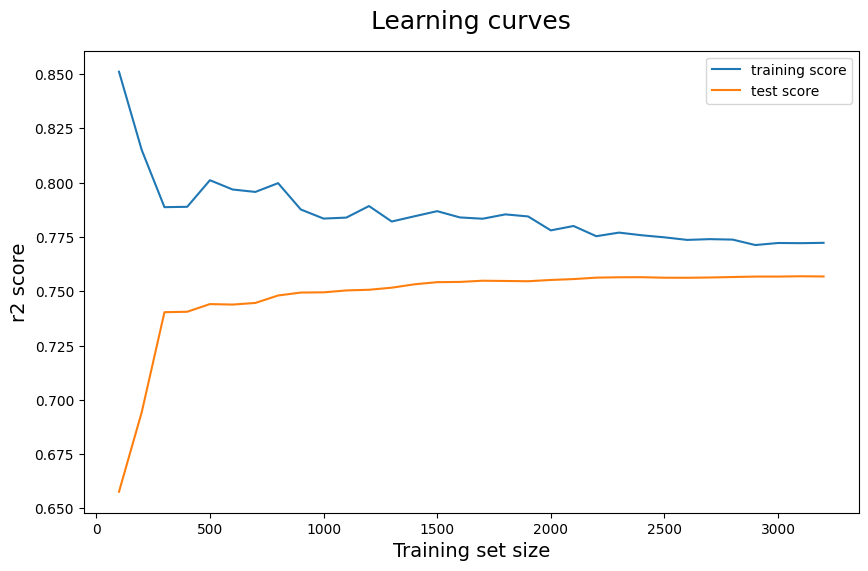

In [101]:
# Create the training size slices
train_sizes = np.arange(100, 3300, 100)

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    estimator = LinearRegression(),
    X = X_train,
    y = y_train,
    train_sizes = train_sizes,
    cv = 5
)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Create and fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

print("R²:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


R²: 0.7528513215798676
Mean Squared Error: 0.23640967478562516
Mean Absolute Error: 0.3043748830069825


# decision tree

In [104]:
from sklearn.tree import DecisionTreeRegressor


In [105]:
# Instantiate the model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
y_pred = tree_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.010442244156309467
R-squared: 0.9890834127439476


In [107]:
# Example of fine-tuning
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [108]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='r2')
print(f"Average R-squared in cross-validation: {scores.mean()}")


Average R-squared in cross-validation: 0.8872118819689838


In [109]:
import pandas as pd

# Get feature importances
feature_importance = pd.DataFrame(tree_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

print(feature_importance)


                      importance
coal_adj_close          0.685112
hard_coal               0.181235
residual_load           0.067200
week_of_year            0.031980
lignite                 0.012890
nat_gas                 0.008652
year                    0.004301
month                   0.003820
oil                     0.003300
ttf_adj_close           0.001184
hydro_storage_in        0.000327
oil_adj_close           0.000000
ttf_volume              0.000000
renewable_share_gen     0.000000
windspeed_brocken       0.000000
windspeed_south         0.000000
windspeed_north         0.000000
renewable_share_load    0.000000
day_of_week             0.000000
hydro_reservoir         0.000000
wind_onshore            0.000000
wind_offshore           0.000000
hydro_storage_out       0.000000
coal_gas                0.000000
biomass                 0.000000
hydro                   0.000000
nuclear                 0.000000
cross_border            0.000000
oil_volume              0.000000


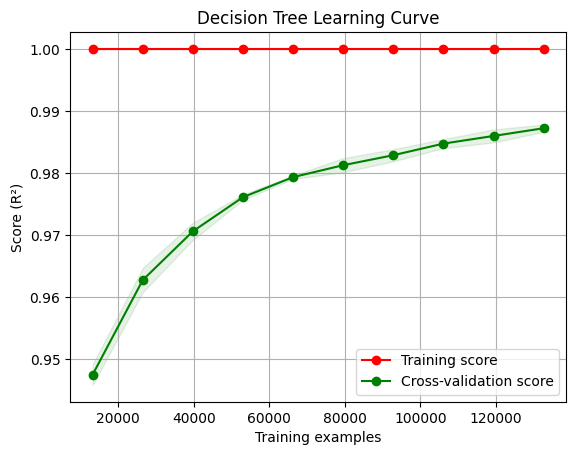

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = DecisionTreeRegressor(random_state=42),
    X = X_train,
    y = y_train,
    train_sizes = train_sizes,
    cv = 5,
    scoring = 'r2'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure()
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score (R²)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


# Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbm_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test data
y_pred = gbm_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.04198716666128349
R-squared: 0.9561055495704568


In [113]:
# Example of a more tuned model
gbm_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
gbm_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [114]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(gbm_model, X_train, y_train, cv=5, scoring='r2')
print(f"Average R-squared in cross-validation: {scores.mean()}")


Average R-squared in cross-validation: 0.9577836396906525


In [116]:
import pandas as pd

# Get feature importances
feature_importance = pd.DataFrame(gbm_model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

print(feature_importance)


                      importance
coal_adj_close          0.663504
hard_coal               0.118796
residual_load           0.088714
week_of_year            0.051253
lignite                 0.016495
hydro_storage_in        0.013754
nat_gas                 0.011739
year                    0.009111
month                   0.007237
oil_adj_close           0.004018
hydro_storage_out       0.003308
wind_onshore            0.003231
nuclear                 0.001992
ttf_adj_close           0.001917
oil                     0.001064
biomass                 0.000899
hydro                   0.000852
cross_border            0.000804
renewable_share_gen     0.000627
ttf_volume              0.000407
wind_offshore           0.000171
renewable_share_load    0.000109
day_of_week             0.000000
hydro_reservoir         0.000000
windspeed_brocken       0.000000
windspeed_south         0.000000
windspeed_north         0.000000
coal_gas                0.000000
oil_volume              0.000000


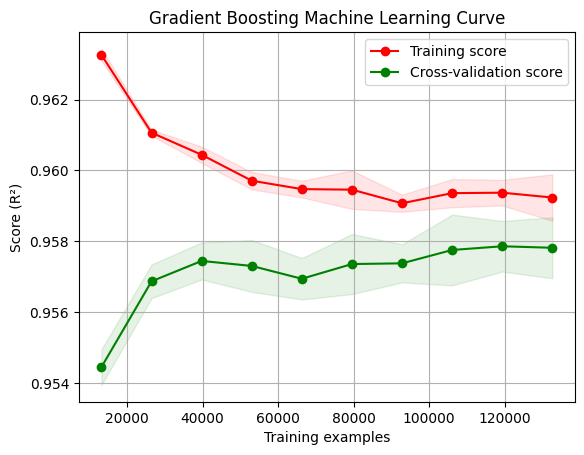

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = GradientBoostingRegressor(random_state=42),
    X = X_train,
    y = y_train,
    train_sizes = train_sizes,
    cv = 5,
    scoring = 'r2'
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure()
plt.title("Gradient Boosting Machine Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score (R²)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [119]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create a base model
gbm = GradientBoostingRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
grid_search.best_params_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time= 3.6min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time= 3.8min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time= 4.1min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time= 7.1min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time= 7.3min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time= 8.1min
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time= 6.3min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=10.7min
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time= 6.6min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=11.1min
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time= 5.7min
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=11.1min
[CV] END ..learning_rate=0.0

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

## Best Model: Gradient Boot Regressor

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

best_gbm_model = GradientBoostingRegressor(learning_rate=0.2, max_depth=7, n_estimators=300, random_state=42)

best_gbm_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(best_gbm_model, 'best_gbm_model.pkl')


# Predict on the training data
y_train_pred = best_gbm_model.predict(X_train)

# Calculate and print the performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")


Training Mean Squared Error: 0.0030214569100154623
Training R-squared: 0.996946553719487


In [121]:
y_test_pred = gbm_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared: {r2_test}")


Test Mean Squared Error: 0.04198716666128349
Test R-squared: 0.9561055495704568


In [122]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Instantiate the model with the optimal hyperparameters
gbm_model_cv = GradientBoostingRegressor(learning_rate=0.2, max_depth=7, n_estimators=300, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gbm_model_cv, X_train, y_train, cv=5, scoring='r2')

# Calculate the mean and standard deviation of the scores
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared: {cv_mean:.4f}, Standard Deviation: {cv_std:.4f}")


Cross-Validation R-squared Scores: [0.99279888 0.99321368 0.99288471 0.99301388 0.99303137]
Mean R-squared: 0.9930, Standard Deviation: 0.0001


## Feature Importance

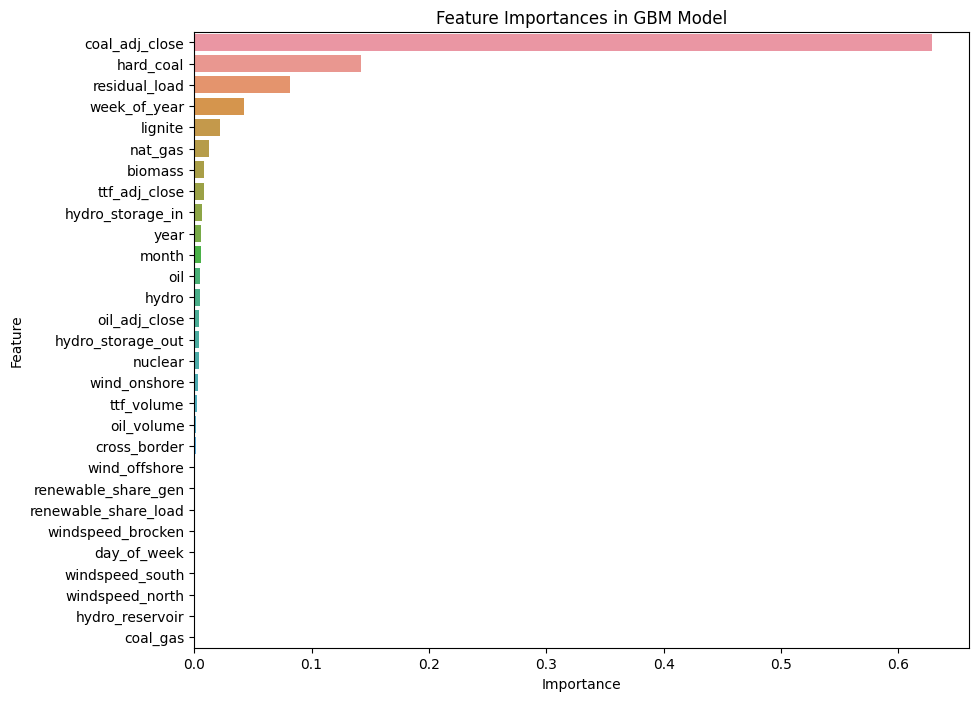

In [123]:
feature_importances = best_gbm_model.feature_importances_

import pandas as pd

features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importances in GBM Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Error Analysis 

In [124]:
# Predictions
y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)

# Residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred


### Residuals Plot

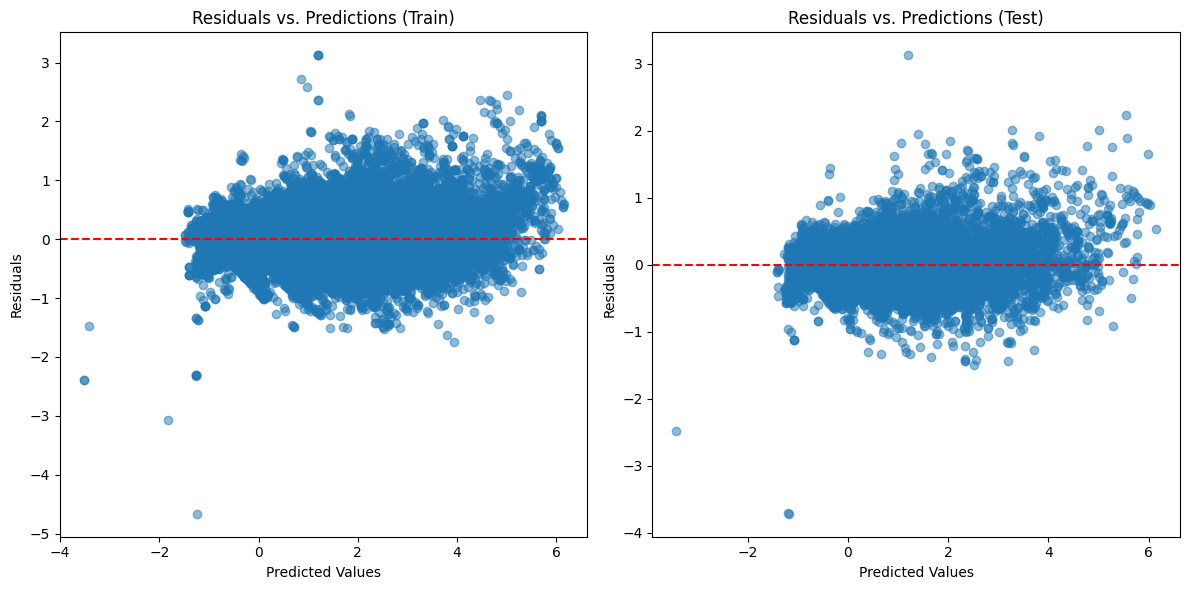

In [125]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, train_residuals, alpha=0.5)
plt.title('Residuals vs. Predictions (Train)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, test_residuals, alpha=0.5)
plt.title('Residuals vs. Predictions (Test)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


### Distribution of Residuals

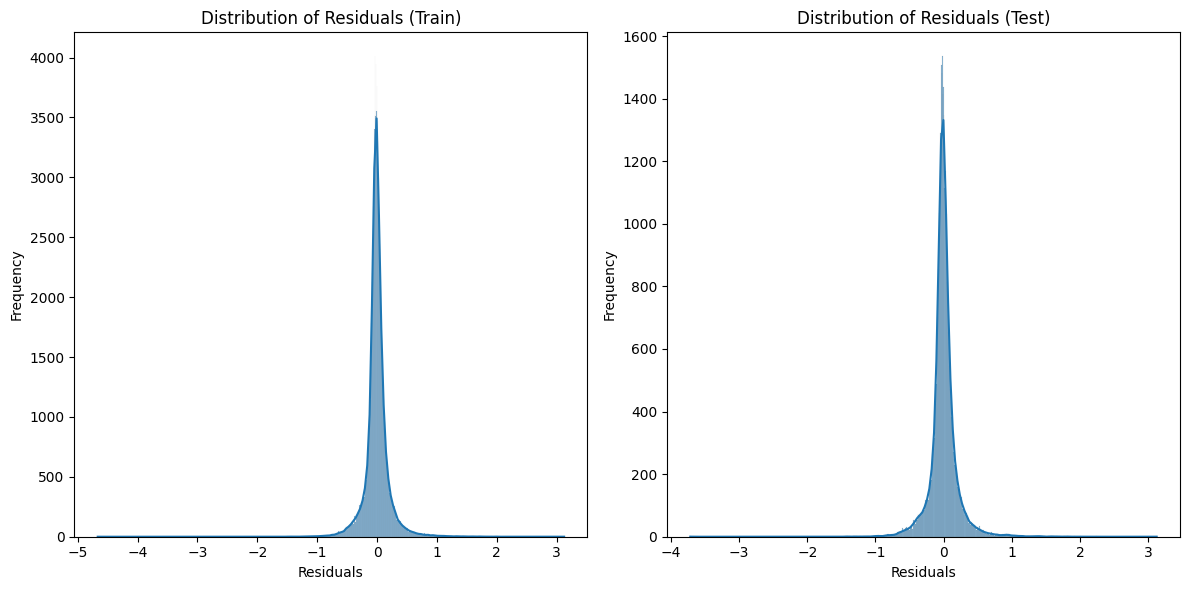

In [126]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True)
plt.title('Distribution of Residuals (Train)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_residuals, kde=True)
plt.title('Distribution of Residuals (Test)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
